## Analyzing Employee Exit Surveys

The datasets we will be analyzing are from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

The aim of this project is to answer the following questions:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 

What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

dete = pd.read_csv("dete_survey.csv")
tafe = pd.read_csv("tafe_survey.csv")

In [2]:
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

`dete` has 56 columns with 822 rows. It contains 18 boolean columns, 1 integer column and 37 object columns.

In [4]:
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [5]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

`rafe` has 72 columns with 702 rows. It contains 70 object columns and 2 float columns.

In [6]:
dete.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Some of the columns have 0 null values while some of the columns have between 0-100 nulls. The 5 columns at the end are almost entirely empty such as the `Aboriginal` column with 806 null values.

In [7]:
tafe.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

We can make the following observations:

- The `dete` dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as NaN.

- Both the `det` and `tafe` dataframes contain many columns that we don't need to complete our analysis.

- Each dataframe contains many of the same columns, but the column names are different.

- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Identifing Missing Values and Drop Unnecessary Columns

In [8]:
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

Not let's drop some columns that we wont need in our analysis.

In [9]:
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49], axis=1)

In [10]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

Now we can do the same for the `tafe` survey.

In [11]:
tafe_survey_updated = tafe.drop(columns=tafe.columns[17:66], axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

## Cleaning the Column Names
Now we can clean the column names.

In [12]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(
    " ", "_").str.strip().str.lower()
dete_survey_updated.columns.tolist()

['id',
 'separationtype',
 'cease_date',
 'dete_start_date',
 'role_start_date',
 'position',
 'classification',
 'region',
 'business_unit',
 'employment_status',
 'career_move_to_public_sector',
 'career_move_to_private_sector',
 'interpersonal_conflicts',
 'job_dissatisfaction',
 'dissatisfaction_with_the_department',
 'physical_work_environment',
 'lack_of_recognition',
 'lack_of_job_security',
 'work_location',
 'employment_conditions',
 'maternity/family',
 'relocation',
 'study/travel',
 'ill_health',
 'traumatic_incident',
 'work_life_balance',
 'workload',
 'none_of_the_above',
 'gender',
 'age',
 'aboriginal',
 'torres_strait',
 'south_sea',
 'disability',
 'nesb']

Now we'll rename some of the column in `tafe_survey_updated`. We'll deal with the rest of the columns later.

In [13]:
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

## Filtering the Data
Now lets remove more the data we don't need.

The end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

First we will select only the data for survey respondont who resigned.

In [14]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [15]:
dete_resignations = dete_survey_updated.copy()[dete_survey_updated["separationtype"].str.contains("Resignation")]
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [16]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [17]:
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated["separationtype"] =="Resignation"]
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


Now all data is filtered so that only people who resigned are selected.

## Verifying the Data

Before we start cleaning and manipulating the rest of our data, we need to verify that the data doesn't contain any major inconsistencies.

In [18]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
07/2012      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

First we're going to clean this column by extracting the years in the `cease_date` column.

In [19]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(r"([0-2][0-9][0-9][0-9])", expand=False)

In [20]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

Now we're going to check the values in the `cease_date` and `dete_start_date` columns in `dete_resignations` and the `cease_date column` in `tafe_resignations`.

In [21]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

It looks like most of the resignations are after 2004 in `dete_resignations`.

In [22]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

For `tafe_resginations`, there was large spike in resignations in 2011.

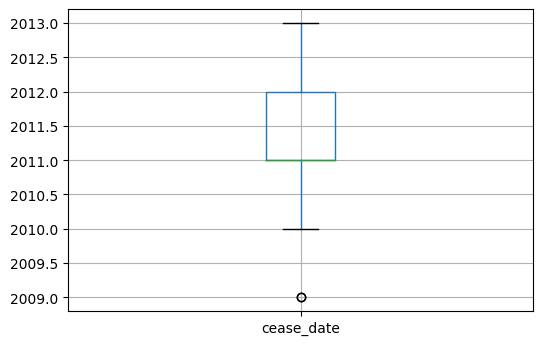

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

tafe_resignations.boxplot(column=["cease_date"])

plt.show()

The boxplot shows that most people resigned between 2011-2012 in `tafe_resignations`.

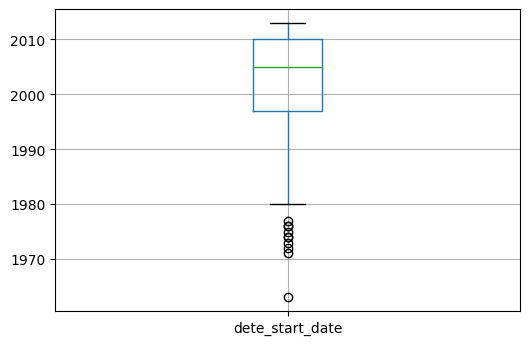

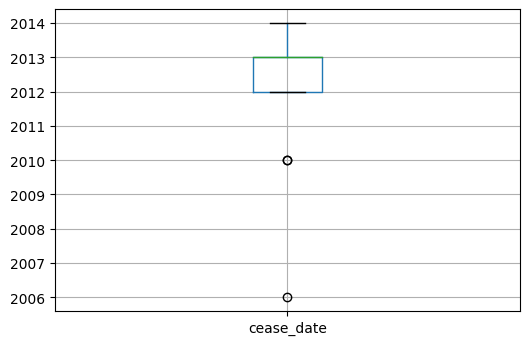

In [24]:
dete_resignations.boxplot(column=["dete_start_date"])
plt.show()
dete_resignations.boxplot(column=["cease_date"])
plt.show()

Overall findings:

- The years in both dataframes don't fully align. The `tafe_survey_updated` dataframe contains some cease dates in 2009, but the `dete_survey_updated` dataframe does not. The `tafe_survey_updated` dataframe also contains many more cease dates in 2010 than the `dete_survey_updaed' dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

## Creating a New Column

Now we can create a new column in `dete` resignations to find out the length of time an employee spent in their workplace.

In [25]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] -  dete_resignations["dete_start_date"]

In [26]:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identifying Dissatisfied Employees

Below are column's that we'll use to categorize employees as "dissatisfied" from each dataframe.

tafe_survey_updated:

`Contributing Factors. Dissatisfaction`

`Contributing Factors. Job Dissatisfaction`

dete_survey_updated:

`job_dissatisfaction`

`dissatisfaction_with_the_department`

`physical_work_environment`

`lack_of_recognition`

`lack_of_job_security`

`work_location`

`employment_conditions`

`work_life_balance`

`workload`

In [27]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We'll replace these values with `True`, `False`, or `NaN`.

In [28]:
def update_vals(val):
    if val == "-" or val == False:
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True

We can use this function to the replace the values in `tafe_resignations`.

In [29]:
tafe_resignations["dissatisfied"] = tafe_resignations[['Contributing Factors. Dissatisfaction',
                                      'Contributing Factors. Job Dissatisfaction']
                                     ].applymap(update_vals).any(1, skipna=False)

tafe_resignations_up = tafe_resignations.copy()

In [30]:
tafe_resignations.dissatisfied.value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Now have a new `dissatisfied` column that shows whether employee left due to job dissatisfaction. Now we'll do the same for `dete_resignations`.

In [31]:
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction",
"dissatisfaction_with_the_department",
"physical_work_environment",
"lack_of_recognition",
"lack_of_job_security",
"work_location",
"employment_conditions",
"work_life_balance",
"workload"]].applymap(update_vals).any(1, skipna=False)

dete_resignations_up = dete_resignations.copy()

dete_resignations.dissatisfied.value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data

So far we've:

- renamed our columns
- dropped irrelevant data
- verfied the data quality
- created new columns for service length, contributing factors, and dissatisfaction

Now we can combine our datasets. We're going to addredate the data according to the `insititute_service` column.

In [32]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

Now let's drop any colums that have less than 500 non-null values.

In [33]:
combined_updated = combined.dropna(axis=1, thresh=500).copy()

## Clean the Service Column

Before we start doing data analysis, we'll clean up the `institute_service` column first.

In [34]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
27.0                   1


This column is trick to clean because it contains values in multiple different forms. We'll convert these numbers into categories which focus more on career stage rather than age.

We'll use the slightly modified definitions below:

New: Less than 3 years at a company

Experienced: 3-6 years at a company

Established: 7-10 years at a company

Veteran: 11 or more years at a company

In [37]:
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")
combined_updated["institute_service_up"] = combined_updated["institute_service_up"].astype("float")

combined_updated.institute_service_up.value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

Now we can map each of these of these values to the career stage defitions above.

In [39]:
def cat(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return "New"
    elif 3 <= val <= 6:
        return "Experienced"
    elif 7 <= val <= 10:
        return "Established"
    elif val >= 11:
        return "Veteran"
    
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(cat)
    
combined_updated["service_cat"].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Data Analysis

Now we can analyse our data. First let's look at the values in `dissatisfied` column.

In [42]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [43]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(value=False)

We filled in the missing values with `False` as it occurs mostly frequently in this column.

In [45]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

Now lets calculate the percentage of dissatisfed employees in the `service_cat` group.

In [50]:
dis_table = pd.pivot_table(data=combined_updated, index="service_cat", values='dissatisfied')

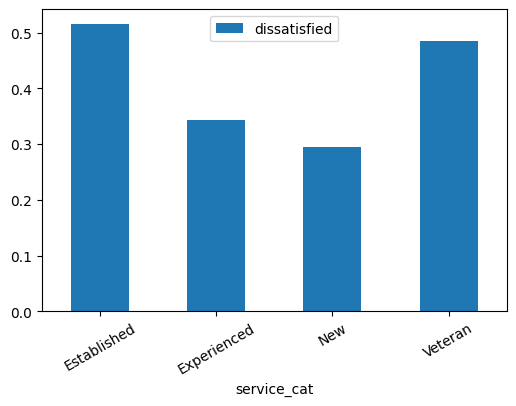

In [57]:
dis_table.plot(kind="bar", rot=30)
plt.x
plt.show()

## Observations

The bar chart shows that employees with more than 7 years of service are generally more likely to resign due to job dissatisfaction than employees with less than 7 years of service.